In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters
from sklearn.model_selection import train_test_split
from keras import regularizers

importacion del Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items() ])

for _ in train_data [0]:
  print(word_index.get(_ -3))

Normalizamos los datos

In [4]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults

In [5]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [6]:
from keras.utils import to_categorical

In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


Separacion de los datos usando trainTest Split

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


Creacion del modelo

In [9]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
          epochs = 30,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/30
15/15 [==============================] - 2s 61ms/step - loss: 3.6434 - accuracy: 0.2514 - val_loss: 3.2688 - val_accuracy: 0.3651
Epoch 2/30
15/15 [==============================] - 1s 36ms/step - loss: 3.0025 - accuracy: 0.4081 - val_loss: 2.4907 - val_accuracy: 0.4502
Epoch 3/30
15/15 [==============================] - 1s 35ms/step - loss: 2.3440 - accuracy: 0.4749 - val_loss: 1.9255 - val_accuracy: 0.5810
Epoch 4/30
15/15 [==============================] - 1s 35ms/step - loss: 1.8827 - accuracy: 0.5516 - val_loss: 1.6411 - val_accuracy: 0.6194
Epoch 5/30
15/15 [==============================] - 1s 47ms/step - loss: 1.6291 - accuracy: 0.6010 - val_loss: 1.4844 - val_accuracy: 0.6683
Epoch 6/30
15/15 [==============================] - 1s 49ms/step - loss: 1.4827 - accuracy: 0.6426 - val_loss: 1.3870 - val_accuracy: 0.6956
Epoch 7/30
15/15 [==============================] - 1s 53ms/step - loss: 1.3599 - accuracy: 0.6759 - val_loss: 1.3130 - val_accuracy: 0.7084
Epoch 8/30
15

Graficacion de los resultados

In [10]:
import matplotlib.pyplot as plt

Funcion de perdidad

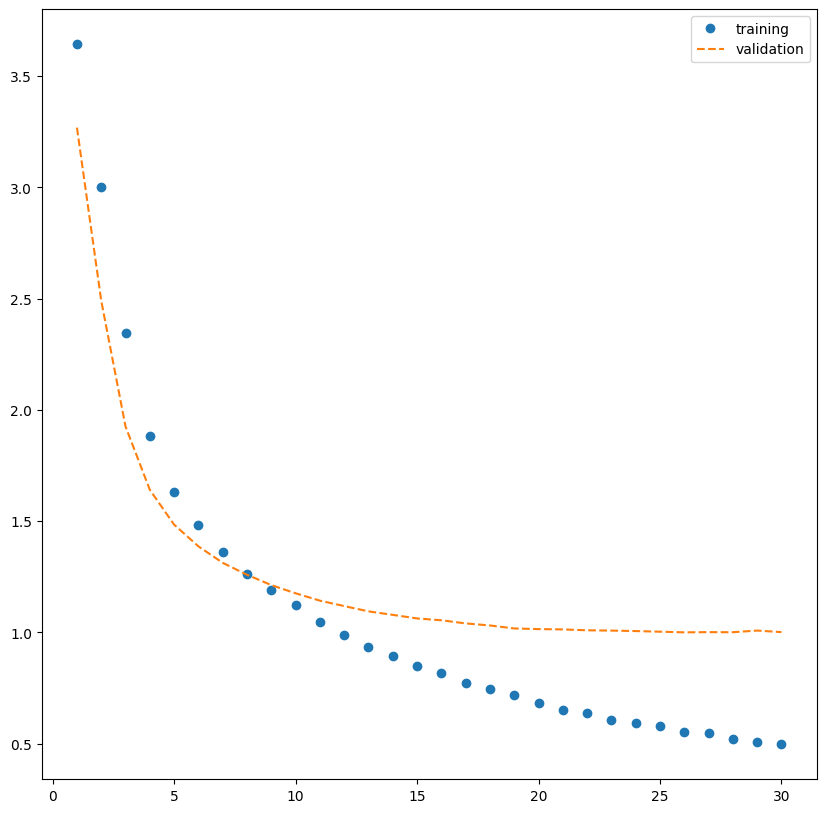

In [11]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize = (10,10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

Accuracy

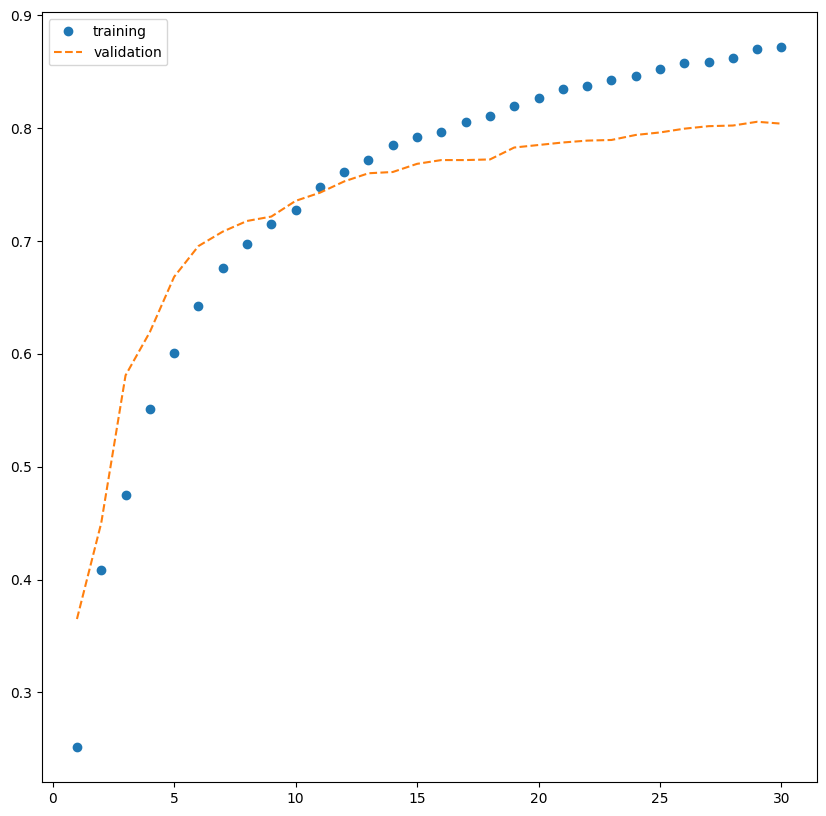

In [12]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

fig = plt.figure(figsize = (10,10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()